# Import relevant library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [4]:
import tensorflow as tf

# exploratory data

In [5]:
sns.set_palette('muted')

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train['Cabin'] = train['Cabin'].fillna(value = 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [10]:
train['Hascabin'] = train['Cabin'].map({0:0})
train['Hascabin'] = train['Hascabin'].fillna(value = 1)
train['Hascabin'] = train['Hascabin'].astype(int)
test['Hascabin'] = test['Cabin'].map({0:0})
test['Hascabin'] = test['Hascabin'].fillna(value = 1)
test['Hascabin'] = test['Hascabin'].astype(int)
train['familysize'] = train['SibSp']+train['Parch'] +1
test['familysize'] = test['SibSp']+test['Parch']+1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hascabin,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1


In [11]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hascabin,familysize
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,891.0,889,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148.0,3,NaN,NaN
top,NaN,NaN,NaN,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",male,NaN,NaN,NaN,1601,NaN,0.0,S,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687.0,644,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.228956,1.904602
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.420397,1.613459
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,1.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000,1.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,0.000000,2.000000


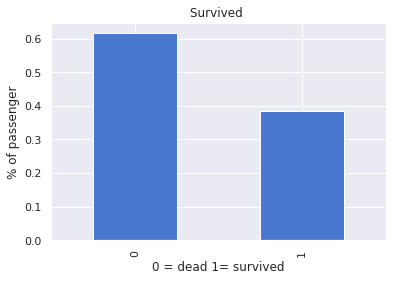

In [12]:
train['Survived'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Survived ')
plt.ylabel('% of passenger')
plt.xlabel('0 = dead 1= survived')
plt.show()

it's about 39% of the passenger survived the disaster

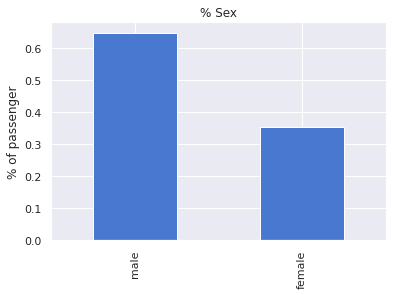

In [13]:
train['Sex'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('% Sex')
plt.ylabel('% of passenger')
plt.show()

the number of male passenger almost double the number of female passenger. it shows that most of the worker on the ship were male and male still dominant in such society.

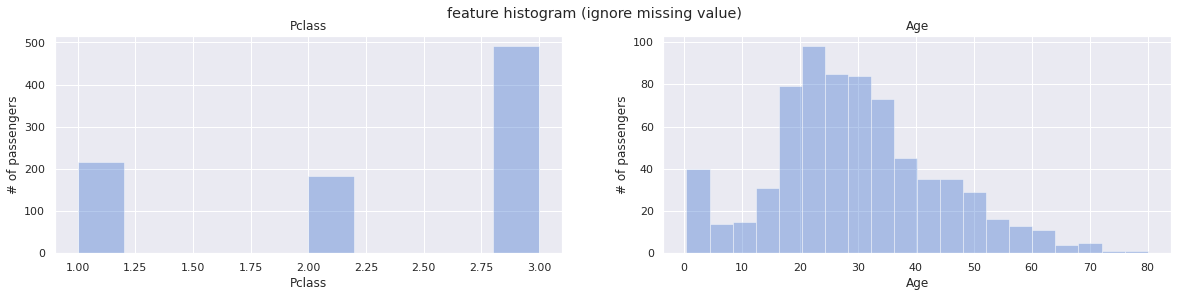

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (20,4))
for i, f in enumerate(['Pclass','Age']):
    sns.distplot(train[f].dropna(), kde = False, ax = axs[i]).set_title(f)
    axs[i].set(ylabel = '# of passengers')
plt.suptitle("""feature histogram (ignore missing value)""")
plt.show()

the number of 3rd class is much higher than the others two. the age of the passengers is quite young. 

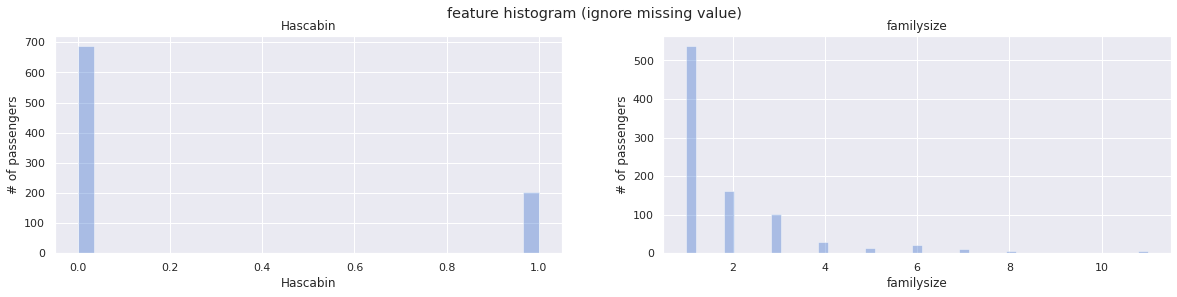

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (20,4))
for i, f in enumerate(['Hascabin','familysize']):
    sns.distplot(train[f].dropna(), kde = False, ax = axs[i] ).set_title(f)
    axs[i].set(ylabel = '# of passengers')
plt.suptitle("""feature histogram (ignore missing value)""")
plt.show()

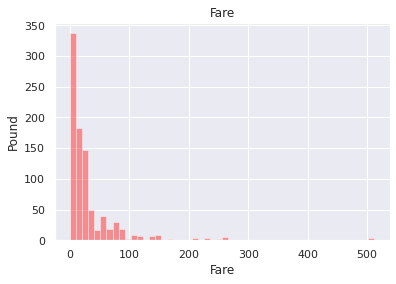

In [16]:
sns.distplot(train['Fare'].dropna(), kde = False, color = 'Red')
plt.title('Fare')
plt.ylabel('Pound')
plt.show()

In [17]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

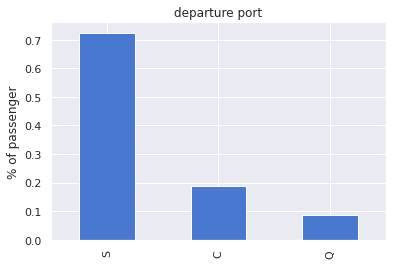

In [18]:
train['Embarked'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('departure port')
plt.ylabel('% of passenger')
plt.show()

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hascabin,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1


# Making assumption

1. Female has higher chance to survive
2. The richer (has cabin, pclass...) has higher chance to survive
3. The younger has higher chance to survive (from 1-> 18) but those in working age (worker) probaly dead

## forming model

In [20]:
train = train.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket','Cabin'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket','Cabin'], axis = 1)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Hascabin,familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,1


In [21]:
train['Sex'] = train['Sex'].map({'male':1, 'female':0})
test['Sex'] = test['Sex'].map({'male':1, 'female':0})
train.head()


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Hascabin,familysize
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,1,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,1,2
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,0,1


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         714 non-null    float64
 5   Fare        891 non-null    float64
 6   Embarked    889 non-null    object 
 7   Hascabin    891 non-null    int64  
 8   familysize  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Working with title

In [23]:
Title = []
for x in range(len(train['Name'])):
    Title.append(re.findall(r"([A-Za-z]+)\.", train['Name'][x])[0])
train['Title'] = Title
train = train.drop(['Name'], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,0,3,1,22.0,7.2500,S,0,2,Mr
1,1,1,0,38.0,71.2833,C,1,2,Mrs
2,1,3,0,26.0,7.9250,S,0,1,Miss
3,1,1,0,35.0,53.1000,S,1,2,Mrs
4,0,3,1,35.0,8.0500,S,0,1,Mr


In [24]:
Title = []
for x in range(len(test['Name'])):
    Title.append(re.findall(r"([A-Za-z]+)\.", test['Name'][x])[0])
test = test.drop(['Name'], axis = 1)
test['Title'] = Title

In [25]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [26]:
train['Title']= train['Title'].replace(['Mrs', 'Ms', 'Mlle', 'Mme'], 'Miss')
train['Title']= train['Title'].replace(['Miss', 'Mr', 'Master'], 'Common')
train['Title']= train['Title'].replace('Jonkheer', 'LowNoble')
train['Title']= train['Title'].replace(['Major', 'Dr', 'Sir', 'Rev'], 'MidNoble')
train['Title']= train['Title'].replace(['Lady', 'Col', 'Don', 'Countess'], 'HighNoble')
train['Title']= train['Title'].replace('Capt', 'ShipCrew')
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Common,534,334
HighNoble,2,3
LowNoble,1,0
MidNoble,11,5
ShipCrew,1,0


In [27]:
test['Title']= test['Title'].replace(['Mrs', 'Ms', 'Mlle', 'Mme', 'Mr', 'Master', 'Miss'], 0)
test['Title']= test['Title'].replace('Jonkheer', 1)
test['Title']= test['Title'].replace(['Major', 'Dr', 'Sir', 'Rev'], 2)
test['Title']= test['Title'].replace(['Lady', 'Col', 'Don', 'Countess', 'Dona'], 3)
test['Title']= test['Title'].replace('Capt', 4)

In [28]:
train['Title'] = train['Title'].map({'Common':0, 'LowNoble':1, 'MidNoble':2, 'HighNoble':3, 'ShipCrew':4})
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,0,3,1,22.0,7.2500,S,0,2,0
1,1,1,0,38.0,71.2833,C,1,2,0
2,1,3,0,26.0,7.9250,S,0,1,0
3,1,1,0,35.0,53.1000,S,1,2,0
4,0,3,1,35.0,8.0500,S,0,1,0


## embarked

In [29]:
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,0,3,1,22.0,7.2500,0,0,2,0
1,1,1,0,38.0,71.2833,1,1,2,0
2,1,3,0,26.0,7.9250,0,0,1,0
3,1,1,0,35.0,53.1000,0,1,2,0
4,0,3,1,35.0,8.0500,0,0,1,0


## Age

fill out all the NaN in the test by regression and prediction base on characteristics

In [30]:
train['Age'] = train['Age'].round()
test['Age'] = test['Age'].round()
train['Age'].describe()

count    714.000000
mean      29.693277
std       14.524527
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,892,3,1,34.0,7.8292,2,1,1,0
1,893,3,0,47.0,7.0000,0,1,2,0
2,894,2,1,62.0,9.6875,2,1,1,0
3,895,3,1,27.0,8.6625,0,1,1,0
4,896,3,0,22.0,12.2875,0,1,3,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,8.0500,0,1,1,0
414,1306,1,0,39.0,108.9000,1,1,1,3
415,1307,3,1,38.0,7.2500,0,1,1,0
416,1308,3,1,NaN,8.0500,0,1,1,0


In [32]:
y_test = test[test['Age'].isnull()]
x_test = test.dropna(axis = 0, subset = ["Age"])

x_test = x_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)


In [33]:
x_test_1 = x_test.drop(['Age', 'Fare', 'PassengerId'], axis = 1)
x_test_2 = x_test['Age']

In [34]:
neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(x_test_1, x_test_2)

KNeighborsRegressor(n_neighbors=2)

In [35]:
y = neigh.predict(y_test.drop(['Age','Fare','PassengerId'], axis = 1))

In [36]:
x_test_1.shape, x_test_2.shape, y_test.drop(['Age','Fare','PassengerId'], axis = 1).shape

((332, 6), (332,), (86, 6))

In [37]:
for x in range(len(y)):
    y[x] = y[x] + np.random.uniform(- test['Age'].std(), test['Age'].std())
y_test['Age'] = y

In [38]:
y_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,902,3,1,14.202380,7.8958,0,1,1,0
1,914,1,0,41.498816,31.6833,0,1,1,0
2,921,3,1,23.645668,21.6792,1,1,3,0
3,925,3,0,23.512076,23.4500,0,1,4,0
4,928,3,0,31.662446,8.0500,0,1,1,0
...,...,...,...,...,...,...,...,...,...
81,1300,3,0,14.463286,7.7208,2,1,1,0
82,1302,3,0,25.471544,7.7500,2,1,1,0
83,1305,3,1,17.220162,8.0500,0,1,1,0
84,1308,3,1,33.544005,8.0500,0,1,1,0


In [39]:
test = pd.concat([x_test, y_test], ignore_index = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Hascabin     418 non-null    int64  
 7   familysize   418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [40]:
x_train_1 = train[train['Age'].isnull()]
x_train_2 = train.dropna(axis = 0, subset = ["Age"])

x_train_1 = x_train_1.reset_index(drop = True)
x_train_2 = x_train_2.reset_index(drop = True)

x_train_21 = x_train_2.drop(['Age', 'Fare'], axis = 1)
x_train_22 = x_train_2['Age']

In [41]:
neigh3 = KNeighborsRegressor(n_neighbors = 2)
neigh3.fit(x_train_21, x_train_22)

KNeighborsRegressor(n_neighbors=2)

In [42]:
z1 = neigh3.predict(x_train_1.drop(['Age','Fare'], axis = 1))

In [43]:
for x in range(len(z1)):
    z1[x] = z1[x] + np.random.uniform(-train['Age'].std(), train['Age'].std())
x_train_1['Age'] = z1

In [44]:
train = pd.concat([x_train_1, x_train_2], ignore_index = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Hascabin    891 non-null    int64  
 7   familysize  891 non-null    int64  
 8   Title       891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


### create age band

In [45]:
train.loc[train['Age'] <= 17, 'Age'] = 0
train.loc[(train['Age'] > 17) & (train['Age'] <= 36), 'Age'] = 1
train.loc[(train['Age'] >36)&(train['Age'] <= 50),'Age'] =2
train.loc[(train['Age'] > 50),'Age'] = 3
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,0,3,1,2.0,8.4583,2,0,1,0
1,1,2,1,1.0,13.0000,0,0,1,0
2,1,3,0,1.0,7.2250,1,0,1,0
3,0,3,1,1.0,7.2250,1,0,1,0
4,1,3,0,0.0,7.8792,2,0,1,0


In [46]:
test.loc[test['Age'] <= 17,'Age'] = 0
test.loc[(test['Age'] > 17) & (test['Age'] <= 36),'Age'] = 1
test.loc[(test['Age'] >36) & (test['Age'] <= 50),'Age'] =2
test.loc[(test['Age'] > 50),'Age'] = 3
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,892,3,1,1.0,7.8292,2,1,1,0
1,893,3,0,2.0,7.0000,0,1,2,0
2,894,2,1,3.0,9.6875,2,1,1,0
3,895,3,1,1.0,8.6625,0,1,1,0
4,896,3,0,1.0,12.2875,0,1,3,0


## Fare
fill out all the NaN value in Fare column

In [47]:
z_test = test[test['Fare'].isnull()]
t_test = test.dropna(axis = 0, subset = ["Fare"])

t_test = t_test.reset_index(drop = True)
z_test = z_test.reset_index(drop = True)

t_test_1 = t_test.drop(['Age', 'Fare','PassengerId'], axis = 1)
t_test_2 = t_test['Fare']

In [48]:
neigh2 = KNeighborsRegressor(n_neighbors = 2)
neigh2.fit(t_test_1, t_test_2)

KNeighborsRegressor(n_neighbors=2)

In [49]:
z2 = neigh2.predict(z_test.drop(['Age','Fare','PassengerId'], axis = 1))
z2

array([7.7958])

In [50]:
for x in range(len(z2)):
    z2[x] = z1[x] + np.random.uniform(-test['Fare'].std(), test['Fare'].std())
z_test['Fare'] = z2

In [51]:
test = pd.concat([z_test, t_test])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 416
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Hascabin     418 non-null    int64  
 7   familysize   418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 32.7 KB


In [52]:
len(train[(train['Fare'] < 50) & (train['Fare'] > 0)])

715

### create Fare band

In [53]:
train.loc[train['Fare'] <= 50, 'Fare'] = 0
train.loc[(train['Fare'] > 50) & (train['Fare'] <= 150), 'Fare'] = 1
train.loc[(train['Fare'] > 150) & (train['Fare'] <= 250),'Fare'] =2
train.loc[(train['Fare'] > 250), 'Fare'] = 3
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,0,3,1,2.0,0.0,2,0,1,0
1,1,2,1,1.0,0.0,0,0,1,0
2,1,3,0,1.0,0.0,1,0,1,0
3,0,3,1,1.0,0.0,1,0,1,0
4,1,3,0,0.0,0.0,2,0,1,0


In [54]:
test.loc[test['Fare'] <= 50, 'Fare'] = 0
test.loc[(test['Fare'] > 50) & (test['Fare'] <= 150), 'Fare'] = 1
test.loc[(test['Fare'] > 150) & (test['Fare'] <= 250), 'Fare'] =2
test.loc[(test['Fare'] > 250), 'Fare'] = 3
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Hascabin,familysize,Title
0,1044,3,1,3.0,0.0,0,1,1,0
0,892,3,1,1.0,0.0,2,1,1,0
1,893,3,0,2.0,0.0,0,1,2,0
2,894,2,1,3.0,0.0,2,1,1,0
3,895,3,1,1.0,0.0,0,1,1,0


without creating bands, i only got to 70% accurate with logistic regression model

by creating bands, i've reached 75.6% accurate but still with logistic regression

the advanges of random forest or tensorflow neural network have not been exploited to its finest, i'm on my way to dig deeper into the problem

# create new features

#### pclass and title

pclass = richer * title = social status

some people are rich but his title is normal mean his social status is not quite high, high title but poor means that they are deappreciated

In [55]:
train['Status'] = (train['Title']+1)*train['Pclass']
train = train.drop(['Title', 'Pclass'], axis = 1)
train.head()

,Survived,Sex,Age,Fare,Embarked,Hascabin,familysize,Status
0,0,1,2.0,0.0,2,0,1,3
1,1,1,1.0,0.0,0,0,1,2
2,1,0,1.0,0.0,1,0,1,3
3,0,1,1.0,0.0,1,0,1,3
4,1,0,0.0,0.0,2,0,1,3


In [56]:
test['Status'] = (test['Title'] + 1)*test['Pclass']
test = test.drop(['Title','Pclass'], axis = 1)

#### Age and familysize

people with higher age and have family tend to sacrify for their family members

In [57]:
train['Sacrify'] = (train['Age']+1)*train['familysize']
train = train.drop(['Age', 'familysize'], axis = 1)

test['Sacrify'] = (test['Age']+1)*test['familysize']
test = test.drop(['Age', 'familysize'], axis = 1)

# Regression

In [58]:
#split the data
split_num = 700

#dataset 1
train1 = train[:split_num]
train.sample(frac=1).reset_index(drop = True)
#dataset 2
train2 = train[:split_num]
train.sample(frac=1).reset_index(drop = True)
#dataset 3
train3 = train[:split_num]
train.sample(frac=1).reset_index(drop = True)
#dataset 4
train4 = train[:split_num]
train.sample(frac=1).reset_index(drop = True)
#dataset5
train5 = train[:split_num]
train6 = train[split_num:]
train.sample(frac=1).reset_index(drop = True)

,Survived,Sex,Fare,Embarked,Hascabin,Status,Sacrify
0,0,1,0.0,0,0,3,2.0
1,0,1,0.0,0,0,3,3.0
2,0,1,0.0,0,0,3,2.0
3,0,1,0.0,0,0,3,6.0
4,0,1,0.0,0,0,3,2.0
...,...,...,...,...,...,...,...
886,0,1,0.0,0,0,3,2.0
887,0,1,0.0,0,0,2,2.0
888,0,1,0.0,2,0,3,6.0
889,0,1,0.0,0,0,3,2.0


In [59]:
#dataset 1
x_train1 = train1.drop('Survived', axis = 1)
y_train1 = train1['Survived']
x_train1.shape, y_train1.shape, test.drop('PassengerId',axis = 1).shape

#dataset2
x_train2 = train2.drop('Survived', axis = 1)
y_train2 = train2['Survived']

#dataset3
x_train3 = train3.drop('Survived', axis = 1)
y_train3 = train3['Survived']

#dataset4
x_train4 = train4.drop('Survived', axis = 1)
y_train4 = train4['Survived']

#dataset5
x_train5 = train5.drop('Survived', axis = 1)
y_train5 = train5['Survived']

#dataset 6
x_train6 = train6.drop('Survived', axis = 1)
y_train6 = train6['Survived']

### logistic regression

In [60]:
logreg = LogisticRegression()

In [61]:
logreg.fit(x_train1, y_train1)

LogisticRegression()

In [62]:
result_logreg = logreg.predict(test.drop('PassengerId',axis = 1))
score_logreg = round(logreg.score(x_train1, y_train1)*100,2)
score_logreg

80.29

### SDG Classifier

In [63]:
sgd = SGDClassifier()
sgd.fit(x_train2, y_train2)

SGDClassifier()

In [64]:
result_sgd = sgd.predict(test.drop('PassengerId',axis = 1))
score_sgd = round(sgd.score(x_train2, y_train2)*100,2)
score_sgd

63.86

### KNeighborsClassifier

In [65]:
knc = KNeighborsClassifier()
knc.fit(x_train3, y_train3)

KNeighborsClassifier()

In [66]:
result_knc = knc.predict(test.drop('PassengerId',axis = 1))
score_knc = round(knc.score(x_train3, y_train3)*100,2)
score_knc

83.0

### RandomForestClassifier

In [67]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train4, y_train4)

RandomForestClassifier()

In [68]:
result_randomforest = randomforest.predict(test.drop('PassengerId',axis = 1))
score_randomforest = round(randomforest.score(x_train4, y_train4)*100, 2)
score_randomforest

86.14

### tf

In [69]:
input_size = 8
output_size = 2
hidden_layer_size = 100

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
     tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [74]:
batch_size = 100
max_epochs = 150
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

model.fit(x_train5.values, y_train5.values,
         batch_size = batch_size,
         epochs = max_epochs,
         callbacks = [early_stopping],
         verbose = 2,
          validation_data = (x_train6.values, y_train6.values)
         )

Epoch 1/150
7/7 - 0s - loss: 0.6268 - accuracy: 0.6414 - val_loss: 0.5686 - val_accuracy: 0.7487
Epoch 2/150
7/7 - 0s - loss: 0.5807 - accuracy: 0.6943 - val_loss: 0.5357 - val_accuracy: 0.7435
Epoch 3/150
7/7 - 0s - loss: 0.5461 - accuracy: 0.7300 - val_loss: 0.5019 - val_accuracy: 0.7435
Epoch 4/150
7/7 - 0s - loss: 0.5179 - accuracy: 0.7429 - val_loss: 0.4929 - val_accuracy: 0.7592
Epoch 5/150
7/7 - 0s - loss: 0.4987 - accuracy: 0.7714 - val_loss: 0.4654 - val_accuracy: 0.7906
Epoch 6/150
7/7 - 0s - loss: 0.4842 - accuracy: 0.7871 - val_loss: 0.4463 - val_accuracy: 0.8063
Epoch 7/150
7/7 - 0s - loss: 0.4683 - accuracy: 0.7914 - val_loss: 0.4372 - val_accuracy: 0.7958
Epoch 8/150
7/7 - 0s - loss: 0.4618 - accuracy: 0.8000 - val_loss: 0.4295 - val_accuracy: 0.8063
Epoch 9/150
7/7 - 0s - loss: 0.4566 - accuracy: 0.7971 - val_loss: 0.4268 - val_accuracy: 0.8063
Epoch 10/150
7/7 - 0s - loss: 0.4536 - accuracy: 0.8057 - val_loss: 0.4449 - val_accuracy: 0.8010
Epoch 11/150
7/7 - 0s - loss:

In [75]:
test_loss, test_accuracy = model.evaluate(test.drop('PassengerId',axis = 1), result_logreg)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

14/14 [==============================] - 0s 7ms/step - loss: 0.5377 - accuracy: 0.5407


In [76]:
result_tf = model.predict_classes(test.drop('PassengerId', axis = 1))
result_tf

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,

## conclusion

until now, random forest seem to have ***out performed*** all others classifier

*for the tensorflow, i need more time to dig deeper to achieve capability to taking advantages of neural network*

things that needed to keep in mind is
- the activation function
- validation
- optimizer and loss function
- optimal batch size, epochs, size of the neural network

## Bagging

In [77]:
num_model = 2
result = (result_logreg + result_knc)/(num_model)
for x in range(len(result)):
    if result[x] < 0.5:
        result[x] = int(0)
    else:
        result[x] = int(1)
result = result.astype(int)
result

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

## extract the prediction

In [78]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':result})
submission

,PassengerId,Survived
0,1044,0
0,892,0
1,893,1
2,894,0
3,895,0
...,...,...
412,1300,1
413,1302,1
414,1305,0
415,1308,0


In [169]:
submission.to_csv('submission.csv', index = False)